In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np
% matplotlib inline

In [2]:
from pyStrat import read_data
from pyStrat import read_formatting
from pyStrat import integrity_check
from pyStrat import initiate_figure
from pyStrat import add_data_axis

In [3]:
data = read_data('Agate_Point.csv')
formatting = read_formatting('AP_formatting.csv')

In [4]:
def map_colour(data_file, format_file):
    data_file.ix[data_file['GRAIN_SIZE']==]

SyntaxError: invalid syntax (<ipython-input-4-25a219bf387c>, line 2)

In [5]:
colour_dict = {}
for i in formatting.GRAIN_SIZE.tolist():
    colour_dict[i] = formatting.ix[formatting['GRAIN_SIZE']==i]['COLOUR'].tolist()[0]

In [6]:
colour_dict

{'agglom': 'purple-green',
 'cover': 'cover',
 'dacite': 'grey',
 'di': 'orange',
 'fss': 'sill',
 'm': 'black',
 'mv': 'green',
 'obsedian': 'swatch',
 'rhyolite': 'brick red',
 'ri': nan,
 'sill': 'brick red-green',
 'slt': 'beige',
 'tuff': 'tuff',
 'v': 'purple'}

In [7]:
for i in range(len(data)):
    data.set_value(i, 'COLOUR', colour_dict[data['GRAIN_SIZE'][i]])
#     data['COLOUR'][i] = colour_dict[data['GRAIN_SIZE'][i]]

In [8]:
# data.drop([64,65], inplace=True)
# data.reset_index(drop=True, inplace=True)

In [9]:
integrity_check(data, formatting)

Colour and width check passed.


In [10]:
data.THICKNESS[1]

0.29999999999999999

In [11]:
data.THICKNESS = data.THICKNESS.apply(pd.to_numeric)

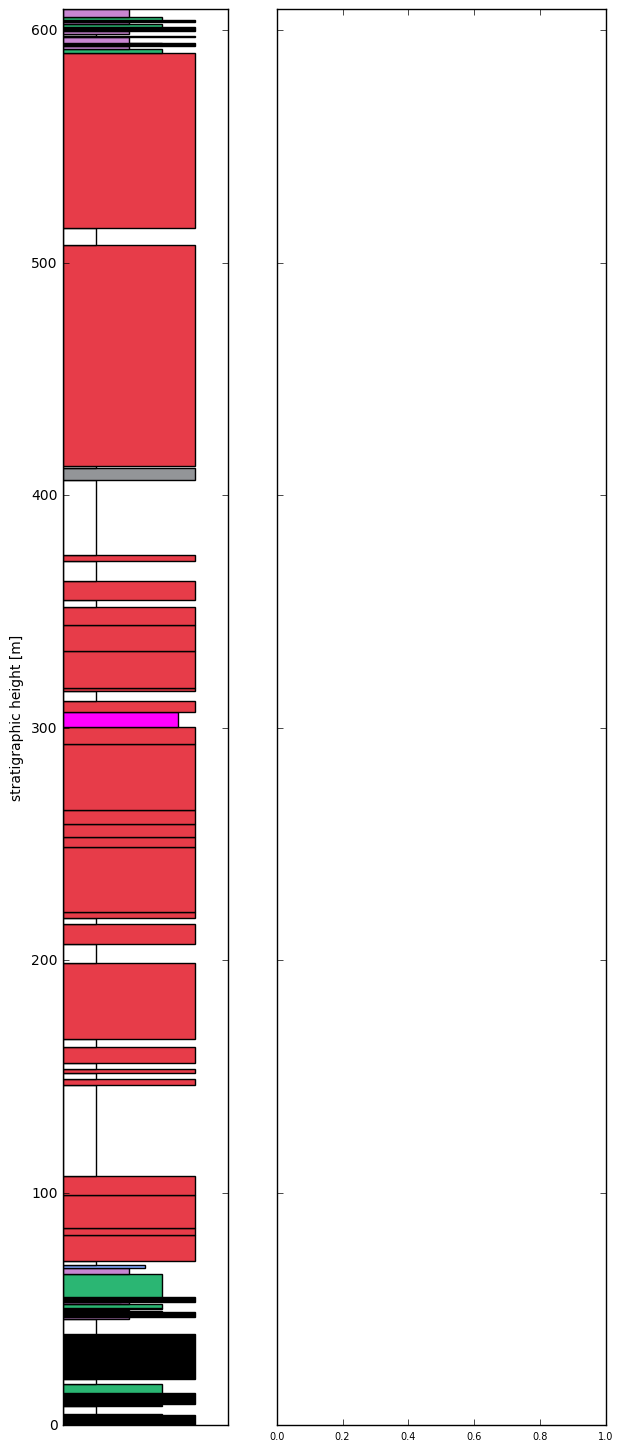

In [12]:
# the backbone of the plot
strat_ratio = 0.03
figwidth = 7
width_ratios = [1,2]#,1,1,1,2,2,2]
fig, axs = initiate_figure(data, formatting, strat_ratio, figwidth, width_ratios)

# additional data axes
# note that the added data axes can pull data from anywhere - they do not have to come from the data.csv
# add_data_axis(fig, axs, 1, np.zeros(len(data['ASH_HEIGHT'])), data['ASH_HEIGHT'], 'scatter', color='red')
# add_data_axis(fig, axs, 2, np.zeros(len(data['DZ_HEIGHT'])), data['DZ_HEIGHT'], 'scatter', color='green')
# add_data_axis(fig, axs, 3, np.zeros(len(data['PM_HEIGHT'])), data['PM_HEIGHT'], 'scatter', color='blue')
# add_data_axis(fig, axs, 4, data['CHEM_d13C'], data['CHEM_HEIGHT'], 'scatter')
# add_data_axis(fig, axs, 5, data['CHEM_d18O'], data['CHEM_HEIGHT'], 'plot')
# add_data_axis(fig, axs, 6, data['CHEM_87Sr/86Sr'], data['CHEM_HEIGHT'], 'scatter')

# for now make style changes using the axis handles, in the standard matplotlib manner
# axs[1].set_xticks([])
# axs[1].set_title('ash')

# axs[2].set_xticks([])
# axs[2].set_title('DZ')

# axs[3].set_xticks([])
# axs[3].set_title('PM')

# axs[4].set_xlabel('$\delta^{13}$C')

# axs[5].set_xlabel('$\delta^{18}$O')

# axs[6].set_xlabel('$^{87}$Sr/$^{86}$Sr')

for i in range(1,len(axs)):
    for tick in axs[i].xaxis.get_major_ticks():
        tick.label.set_fontsize(7)
              
plt.savefig('AP_strat.pdf')

plt.show(fig)